# FlowNetPytorch: measure optical flow

## [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ml4a/ml4a-guides/blob/ml4a.net/examples/models/FlowNetPytorch.ipynb)

Computes [optical flow](https://en.wikipedia.org/wiki/Optical_flow) between images to detect and measure motion (e.g. between consecutive frames of a video). See the [original code](https://github.com/ClementPinard/FlowNetPytorch/) and [paper](https://arxiv.org/abs/1612.01925).

## Set up ml4a and enable GPU

If you don't already have ml4a installed, or you are opening this in Colab, first enable GPU (`Runtime` > `Change runtime type`), then run the following cell to install ml4a and its dependencies.

In [ ]:
%tensorflow_version 1.x
!pip3 install --quiet ml4a

## Get optical flow between images

First we load two images, which happen to be consecutive frames of a movie. 

Downloading...
From: https://drive.google.com/uc?id=1e9cPyDMdsVIF26RI6htlALExiHbCPiXW
To: /home/bzion/.ml4a/_data/sample_images/teddybear_frame1.png
100%|██████████| 271k/271k [00:00<00:00, 9.60MB/s]
Downloading...
From: https://drive.google.com/uc?id=1iL8r4LxRKNZH9xf0qa1bLW-hDXU2-gT8
To: /home/bzion/.ml4a/_data/sample_images/teddybear_frame2.png
100%|██████████| 358k/358k [00:00<00:00, 5.25MB/s]


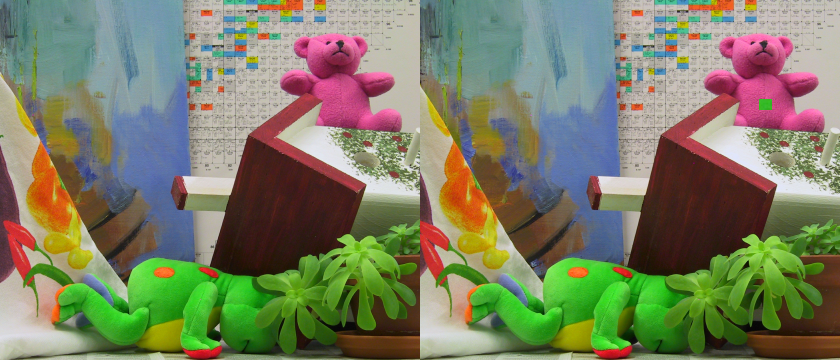

In [1]:
from ml4a import image

# ml4a comes with these two sample images to demonstrate optical low
img1 = image.load_sample_image('teddybear_frame1.png')
img2 = image.load_sample_image('teddybear_frame2.png')

image.display([img1, img2])

In [2]:
from ml4a.models import flownet

# get flow from img1 to img2
flow = flownet.run(img1, img2) 

# blurring the flow reduces any high-frequency noise in the raw flowmap
flow = flownet.blur(flow, blur_times=10)

Downloading...
From: https://drive.google.com/uc?id=1jbWiY1C_nqAUJRYZu7mwzV6CK7ugsa5v
To: /home/bzion/.ml4a/FlowNetPytorch/flownets_EPE1.951.pth.tar
155MB [00:01, 106MB/s]  


It's easier to visualize the flowmap if we map it to color. Then we can display it.

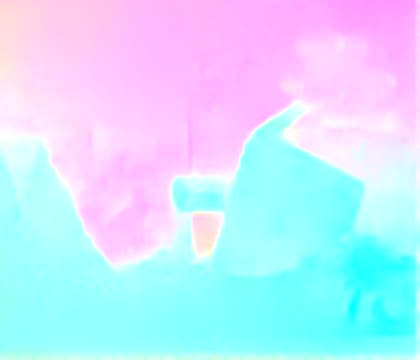

In [3]:
rgb_flow = flownet.run(img1, img2, to_rgb=True) 
image.display(rgb_flow)

One way to see what the optical flow does is to use the flowmap on one of the images to reconstruct the other. We can do that with `canvas.map_image`.

image 2


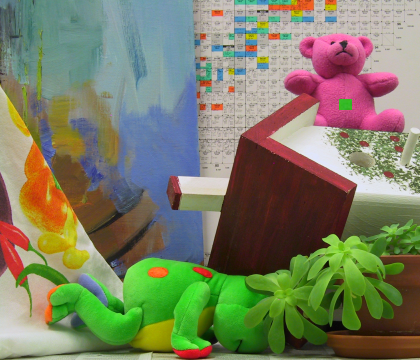

image 2 reconstructed from image 1 + flow


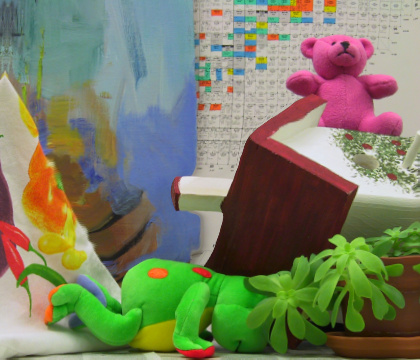

In [4]:
from ml4a.canvas import canvas

mapping_1to2 = flownet.flow_to_mapping(-flow)
mapping_2to1 = flownet.flow_to_mapping(flow)

img2_reconstructed = canvas.map_image(img1, mapping_1to2)
img1_reconstructed = canvas.map_image(img2, mapping_2to1)

image.display(img2, title="image 2")
image.display(img2_reconstructed, title="image 2 reconstructed from image 1 + flow")
